In [1]:
import dm_den_viz
import dm_den
import paths
import cropper
import fitting
import lmfit
import pickle
import staudt_utils
import numpy as np
import pandas as pd
from importlib import reload
from IPython.display import display, Latex
from astropy import units as u, constants as c

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib import rcParams

rcParams['axes.labelsize']=15.
rcParams['xtick.labelsize'] = 12.
rcParams['ytick.labelsize'] = 12.
rcParams['figure.dpi'] = 110.

mls = 11. #marker label size
#result_figsize = (4.5,3.5) #figure size for the main result plots (rho & sigma)
result_figsize = (4.5,4.8) #figure size for the main result plots (rho & sigma)

KeyError: "None of [Index(['vc100'], dtype='object')] are in the [columns]"

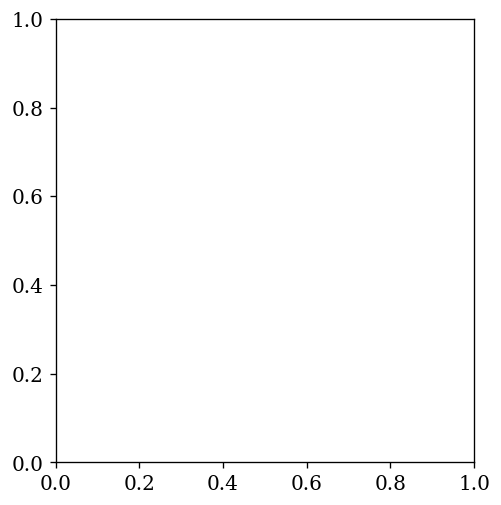

In [3]:
reload(dm_den_viz)
dm_den_viz.plt_vs_vc('disp_dm_disc_cyl', 
                     source_fname = 'dm_stats_dz1.0_20230616.h5',
                     tgt_fname='disp_vs_vphi.png',
                     update_val=True,
                     figsize=result_figsize, labelsize=mls, 
                     minarrow=0.2,
                     adjust_text_kwargs={#'expand_points':(1.5,1.5),
                                         #'force_points':(.2,2.),
                                         #'expand_text':(1.05,2.),
                                         #'expand_objects':(1.3,1.3),
                                         #'force_objects':(0.3,0.3)
                                        },
                     dpi_show=120, 
                     xtickspace=0.2, 
                     ytickspace=20.,
                     verbose=False, beta_sig=1.-0.682, 
                     color='masses'
                    )

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

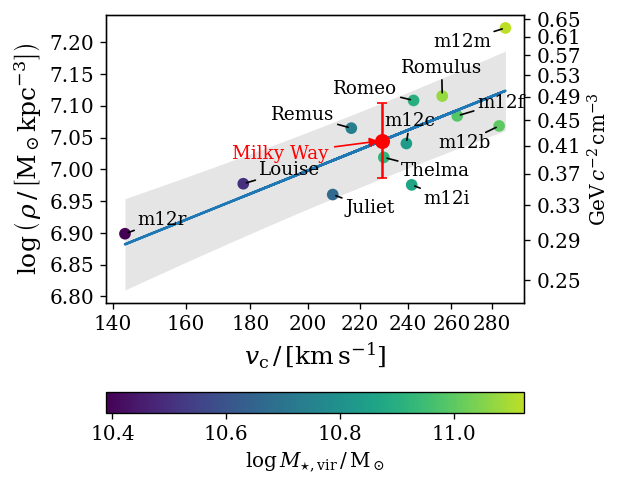

In [3]:
rho_hat = dm_den_viz.plt_vs_vc('den_disc',
                               source_fname = 'dm_stats_20221208_v100.h5',
                               tgt_fname='den_vs_vphi.png',
                               update_val=True,
                               minarrow=0.03,
                               adjust_text_kwargs={'expand_points':(1.5,1.5),
                                                   #'force_points':(1.2,1.3)
                                                  },
                               figsize=result_figsize, labelsize=mls, 
                               verbose=False,
                               v0=dm_den_viz.v0_eilers,
                               dv0=dm_den_viz.dv0_eilers,
                               dpi_show=120,
                               xtickspace=0.2, beta_sig=1.-0.682, 
                               color='masses')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

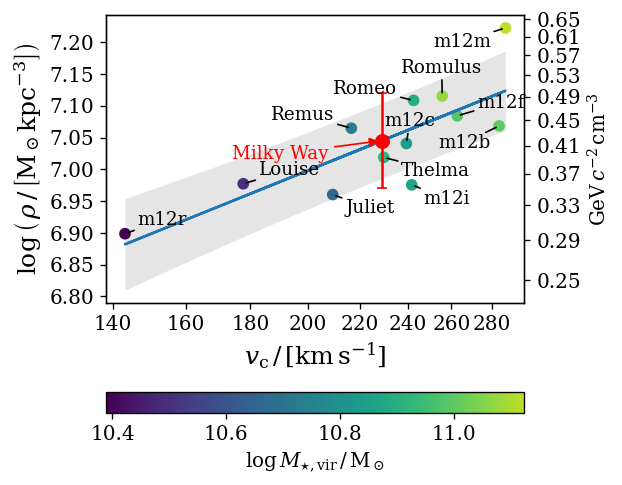

In [36]:
rho_hat = dm_den_viz.plt_vs_vc('den_disc',
                               source_fname = 'dm_stats_20221208_v100.h5',
                               tgt_fname='den_vs_vphi.png',
                               update_val=True,
                               minarrow=0.03,
                               adjust_text_kwargs={'expand_points':(1.5,1.5),
                                                   #'force_points':(1.2,1.3)
                                                  },
                               figsize=result_figsize, labelsize=mls, 
                               verbose=False,
                               v0=dm_den_viz.vc_eilers,
                               dv0=dm_den_viz.dvc_eilers,
                               dpi_show=120,
                               xtickspace=0.2, beta_sig=1.-0.682, 
                               color='masses')

100% |########################################################################|


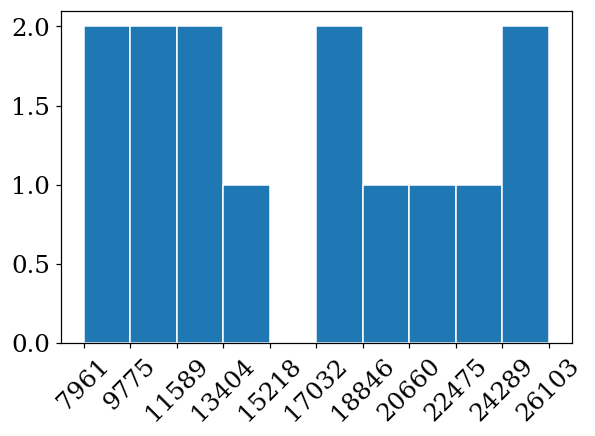

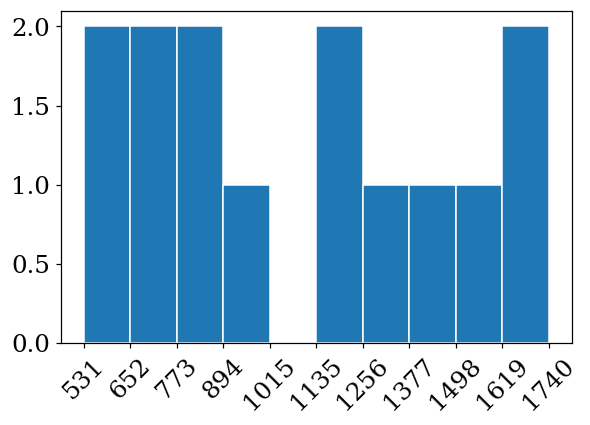

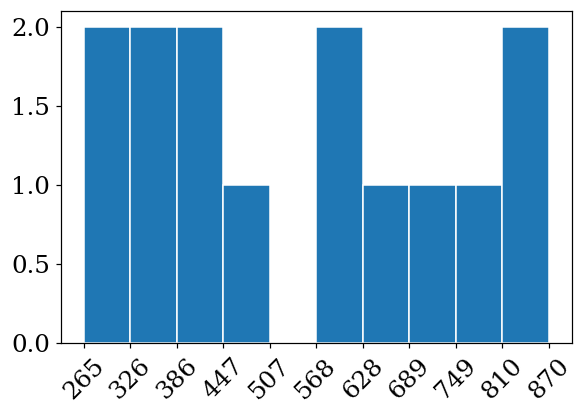

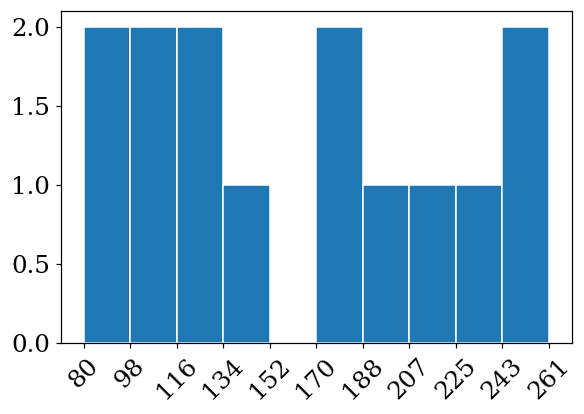

In [27]:
dm_den_viz.plt_particle_counts()

3.48 kpc arclength bins
0.92\%


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

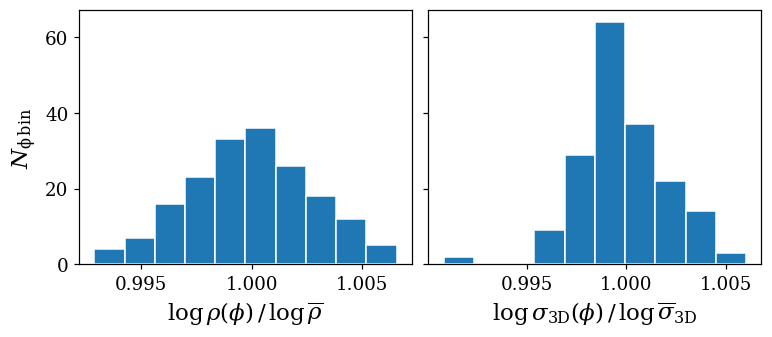

In [3]:
reload(dm_den_viz)
print('{0:0.2f} kpc arclength bins'.format(2.*np.pi*8.3/15.))
dm_den_viz.plt_disc_diffs(only_log=True, figsize=(8,3),
                          tgt_fname='disc_diffs.png',
                          update_val=True)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

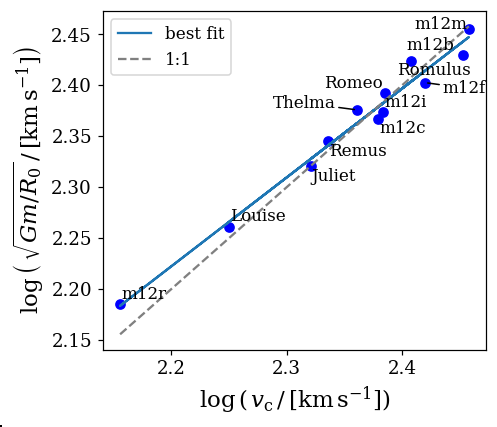

In [5]:
dm_den_viz.plt_gmr_vs_vc(tgt_fname='gmr_vs_vc.png', 
                         figsize=(4.5,4), minarrow=0.03)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

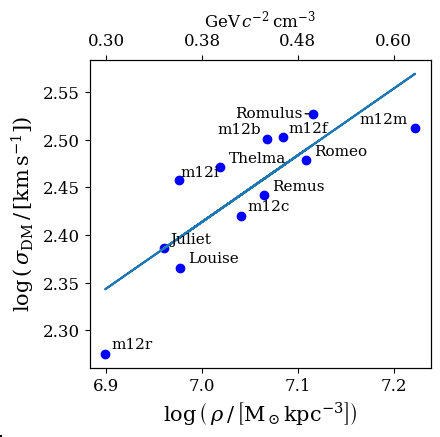

In [39]:
_ = dm_den_viz.plt_slr('dm_stats_20221110.h5',
                   'den_disc', 'disp_dm_disc_cyl',
                   dm_den_viz.den_label, dm_den_viz.disp_label,
                   'log', 'log', dropgals=['m12w','m12z'],
                   figsize=(4.4,4.), arrowprops={'arrowstyle':'-'},
                   adjust_text_kwargs={'expand_points':(1.3,1.3)},
                   labelsize=mls, show_formula='outside',
                   tgt_fname='disp_vs_den.png', minarrow=0.04,
                   #ax_slr_kwargs={'prediction_x':[[dm_den_viz.rho_sofu],
                   #                               10.**rho_hat[0][0]],
                   #               'dX':[[dm_den_viz.drho_sofu],
                   #                      rho_hat[1][0] \
                   #                      *np.sqrt(10.**(rho_hat[0][0][0]*2.) \
                   #                               * np.log(10.)**2.)]}
                      )
# The extra math on the error bar from my prediction is to get the
# log error bar into a linear error bar that the program will then
# convert back into the original error bar. (The program expects linear
# error bars, even though it might display log error bars in the end.)

#print(_)

In [148]:
df = dm_den.load_data('dm_stats_20220715.h5').drop(['m12w', 'm12z'])
cor_df = df \
    [['disp_dm_disc_cyl',
      'den_disc',
      'v_dot_phihat_disc(T<=1e3)',
      'vcirc']] \
    .rename(columns={'disp_dm_disc_cyl': '$\sigma_\mathrm{3D}$', 
                     'den_disc': '$\rho$',
                     'v_dot_phihat_disc(T<=1e3)': '$v_c$',
                     'vcirc': '$\sqrt{Gm/R_0}$'}) \
    .corr()
for i in range(cor_df.shape[0]):
    for j in range(cor_df.shape[1]):
        if j>i:
            cor_df.iloc[i,j] = ''
caption = 'Correlations between the four variables of interest'
with open(paths.tables+'corr.tex','w') as tf:
    l = cor_df.to_latex(escape=False,
                        float_format='{:0.2f}'.format,
                        caption=caption,
                        label='table:corr')
    tf.write(l)
cor_df

/var/folders/94/r7q1ltfd5cdf55qhtt067d380000gn/T/ipykernel_46298/163943358.py:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  l = cor_df.to_latex(escape=False,


,$\sigma_\mathrm{3D}$,$\rho$,$v_c$,$\sqrt{Gm/R_0}$
$\sigma_\mathrm{3D}$,1.000000,,,
$\rho$,0.784196,1.0,,
$v_c$,0.929061,0.778319,1.0,
$\sqrt{Gm/R_0}$,0.963847,0.829554,0.984716,1.0


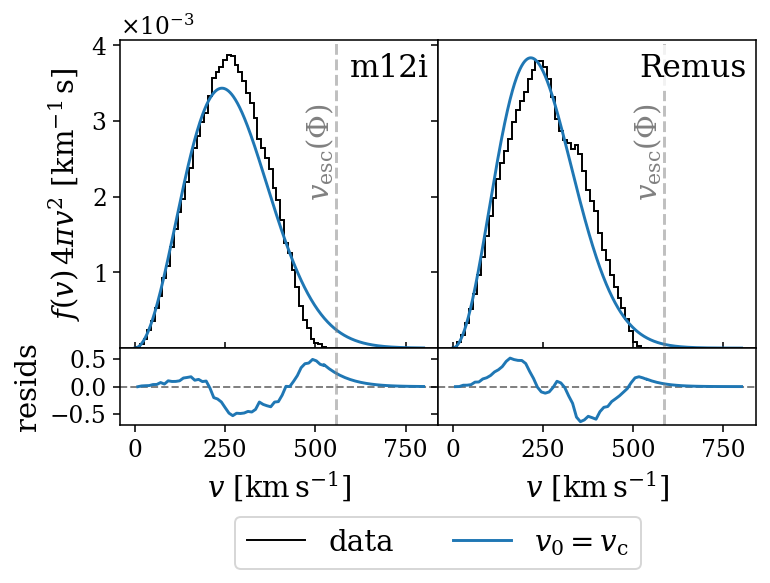

In [5]:
reload(fitting)
fitting.plt_naive(gals=['m12i', 'Remus'],
                  tgt_fname='distribs_from_predicted_sigma.png',
                  show_sigma_vc=False, show_exp=False, show_sigma_meas=False)

In [135]:
params_ = lmfit.Parameters()
params_.add('ddfrac', value=0.07894737)
params_.add('dhfrac', value=0.10526316)

fitting.diff_fr68_agg(params_, pdfs_, 
                      dm_den.load_data('dm_stats_20221208.h5'),
                      assume_corr=True,
                      incl_area=True,
                      verbose=True)

ddfrac = 0.0789, dhfrac = 0.1053, SSE = 2.201e-03, frac within = 0.7050, area = 0.0413


array([0.02231051, 0.04127134])

100% |#########################################################################################################|


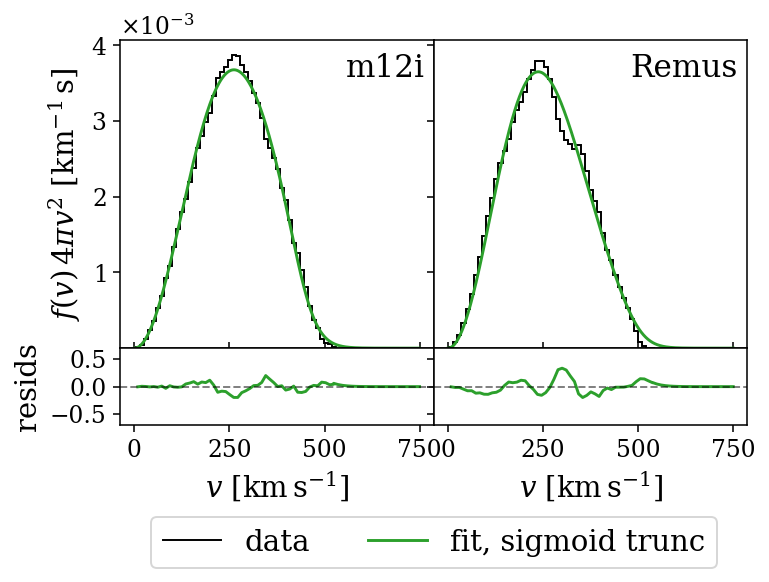

{'m12i': 444.6512037640283, 'Remus': 501.90045185756355}

In [6]:
reload(fitting)
fitting.fit_vdamp(gals=['m12i', 'Remus'],
                  tgt_fname='vdamp_fits.png')

Using ddfrac = 0.07500
Using dhfrac = 0.13125


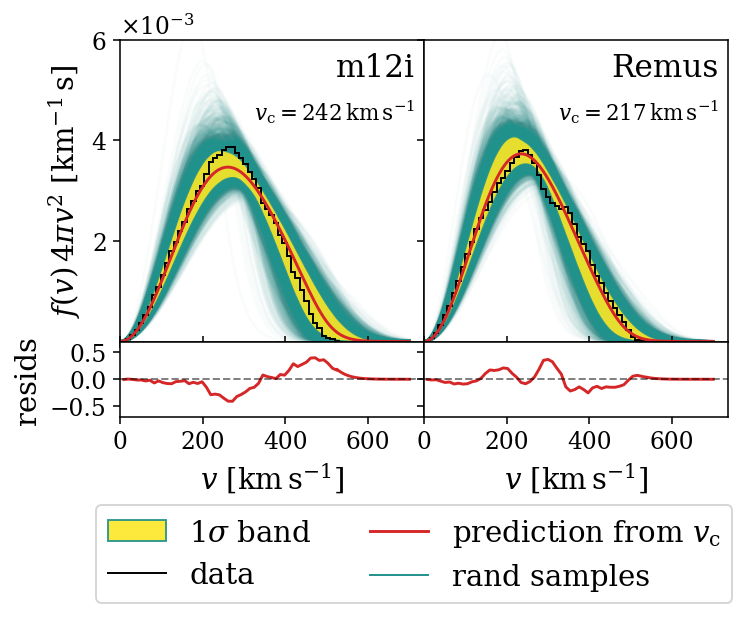

In [4]:
reload(fitting)
result = fitting.plt_universal(gals=['m12i', 'Remus'], update_values=False, 
                               tgt_fname='universal_fits.png', 
                               band_color=plt.cm.viridis(1.), band_alpha=0.9,
                               data_color='k', ymax=0.006)

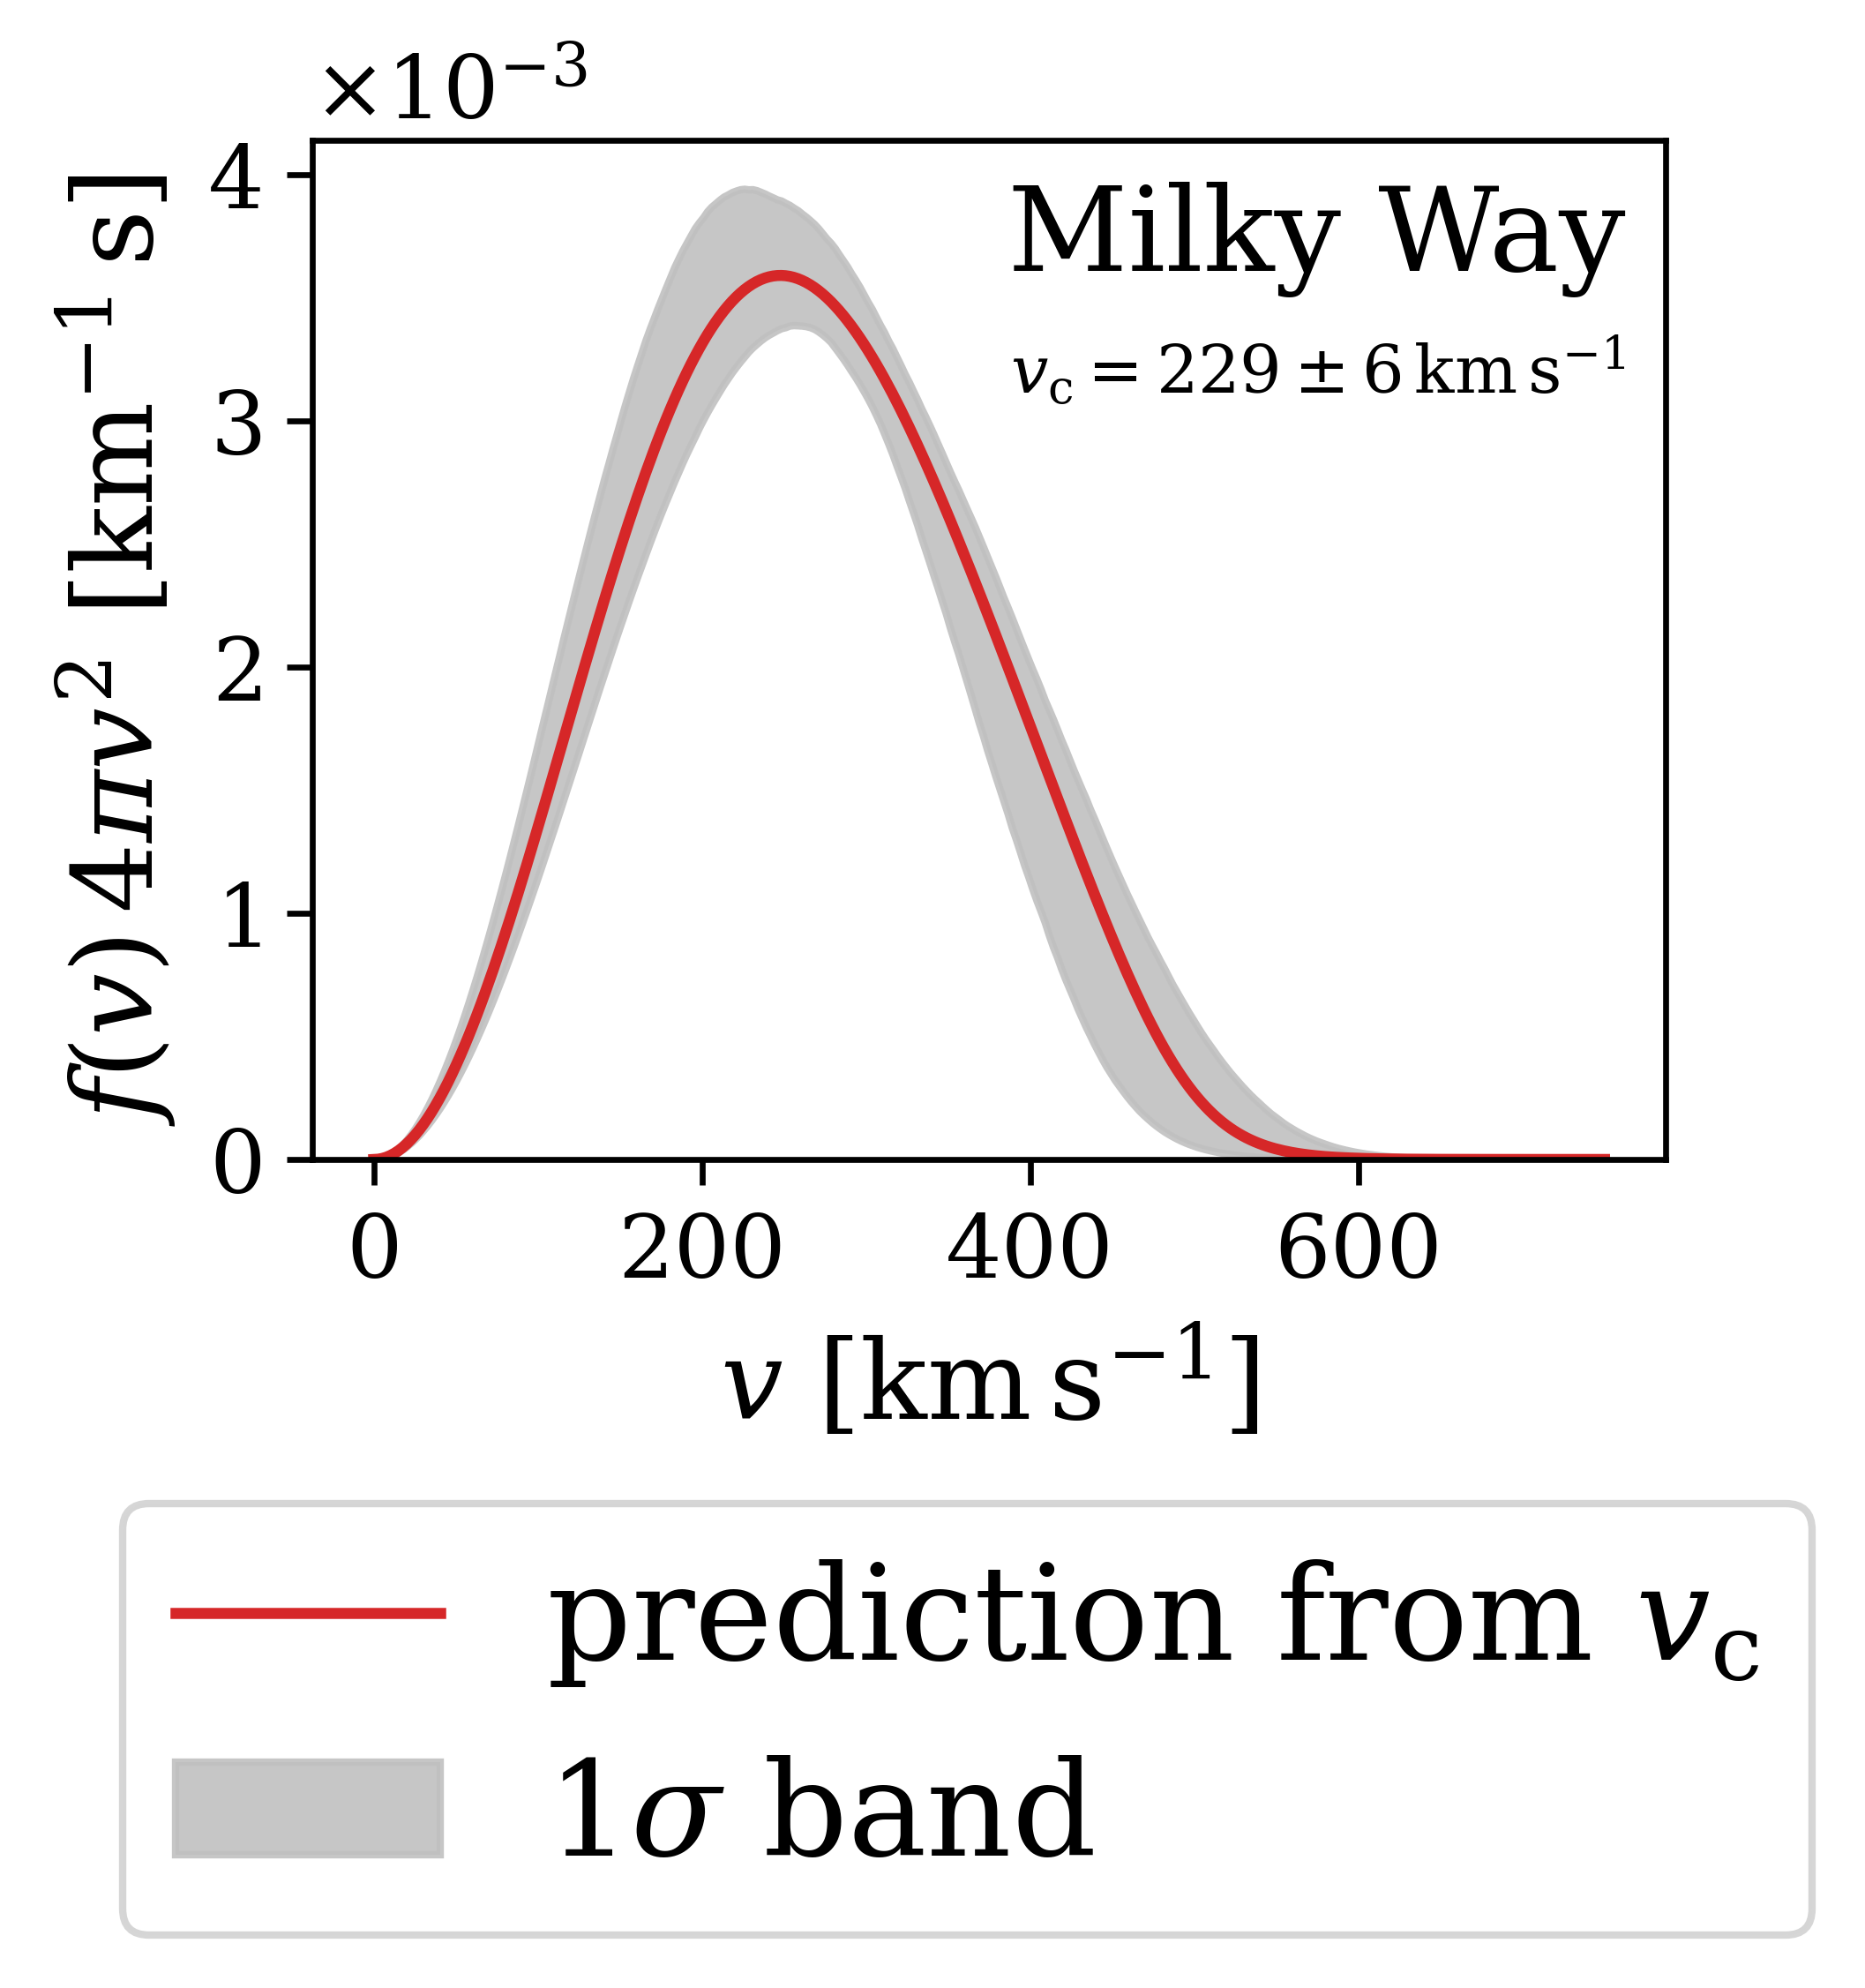

In [26]:
%matplotlib inline
reload(fitting)
reload(dm_den_viz)
dm_den_viz.plt_mw(tgt_fname='distrib_mw.png', dvc=6.)

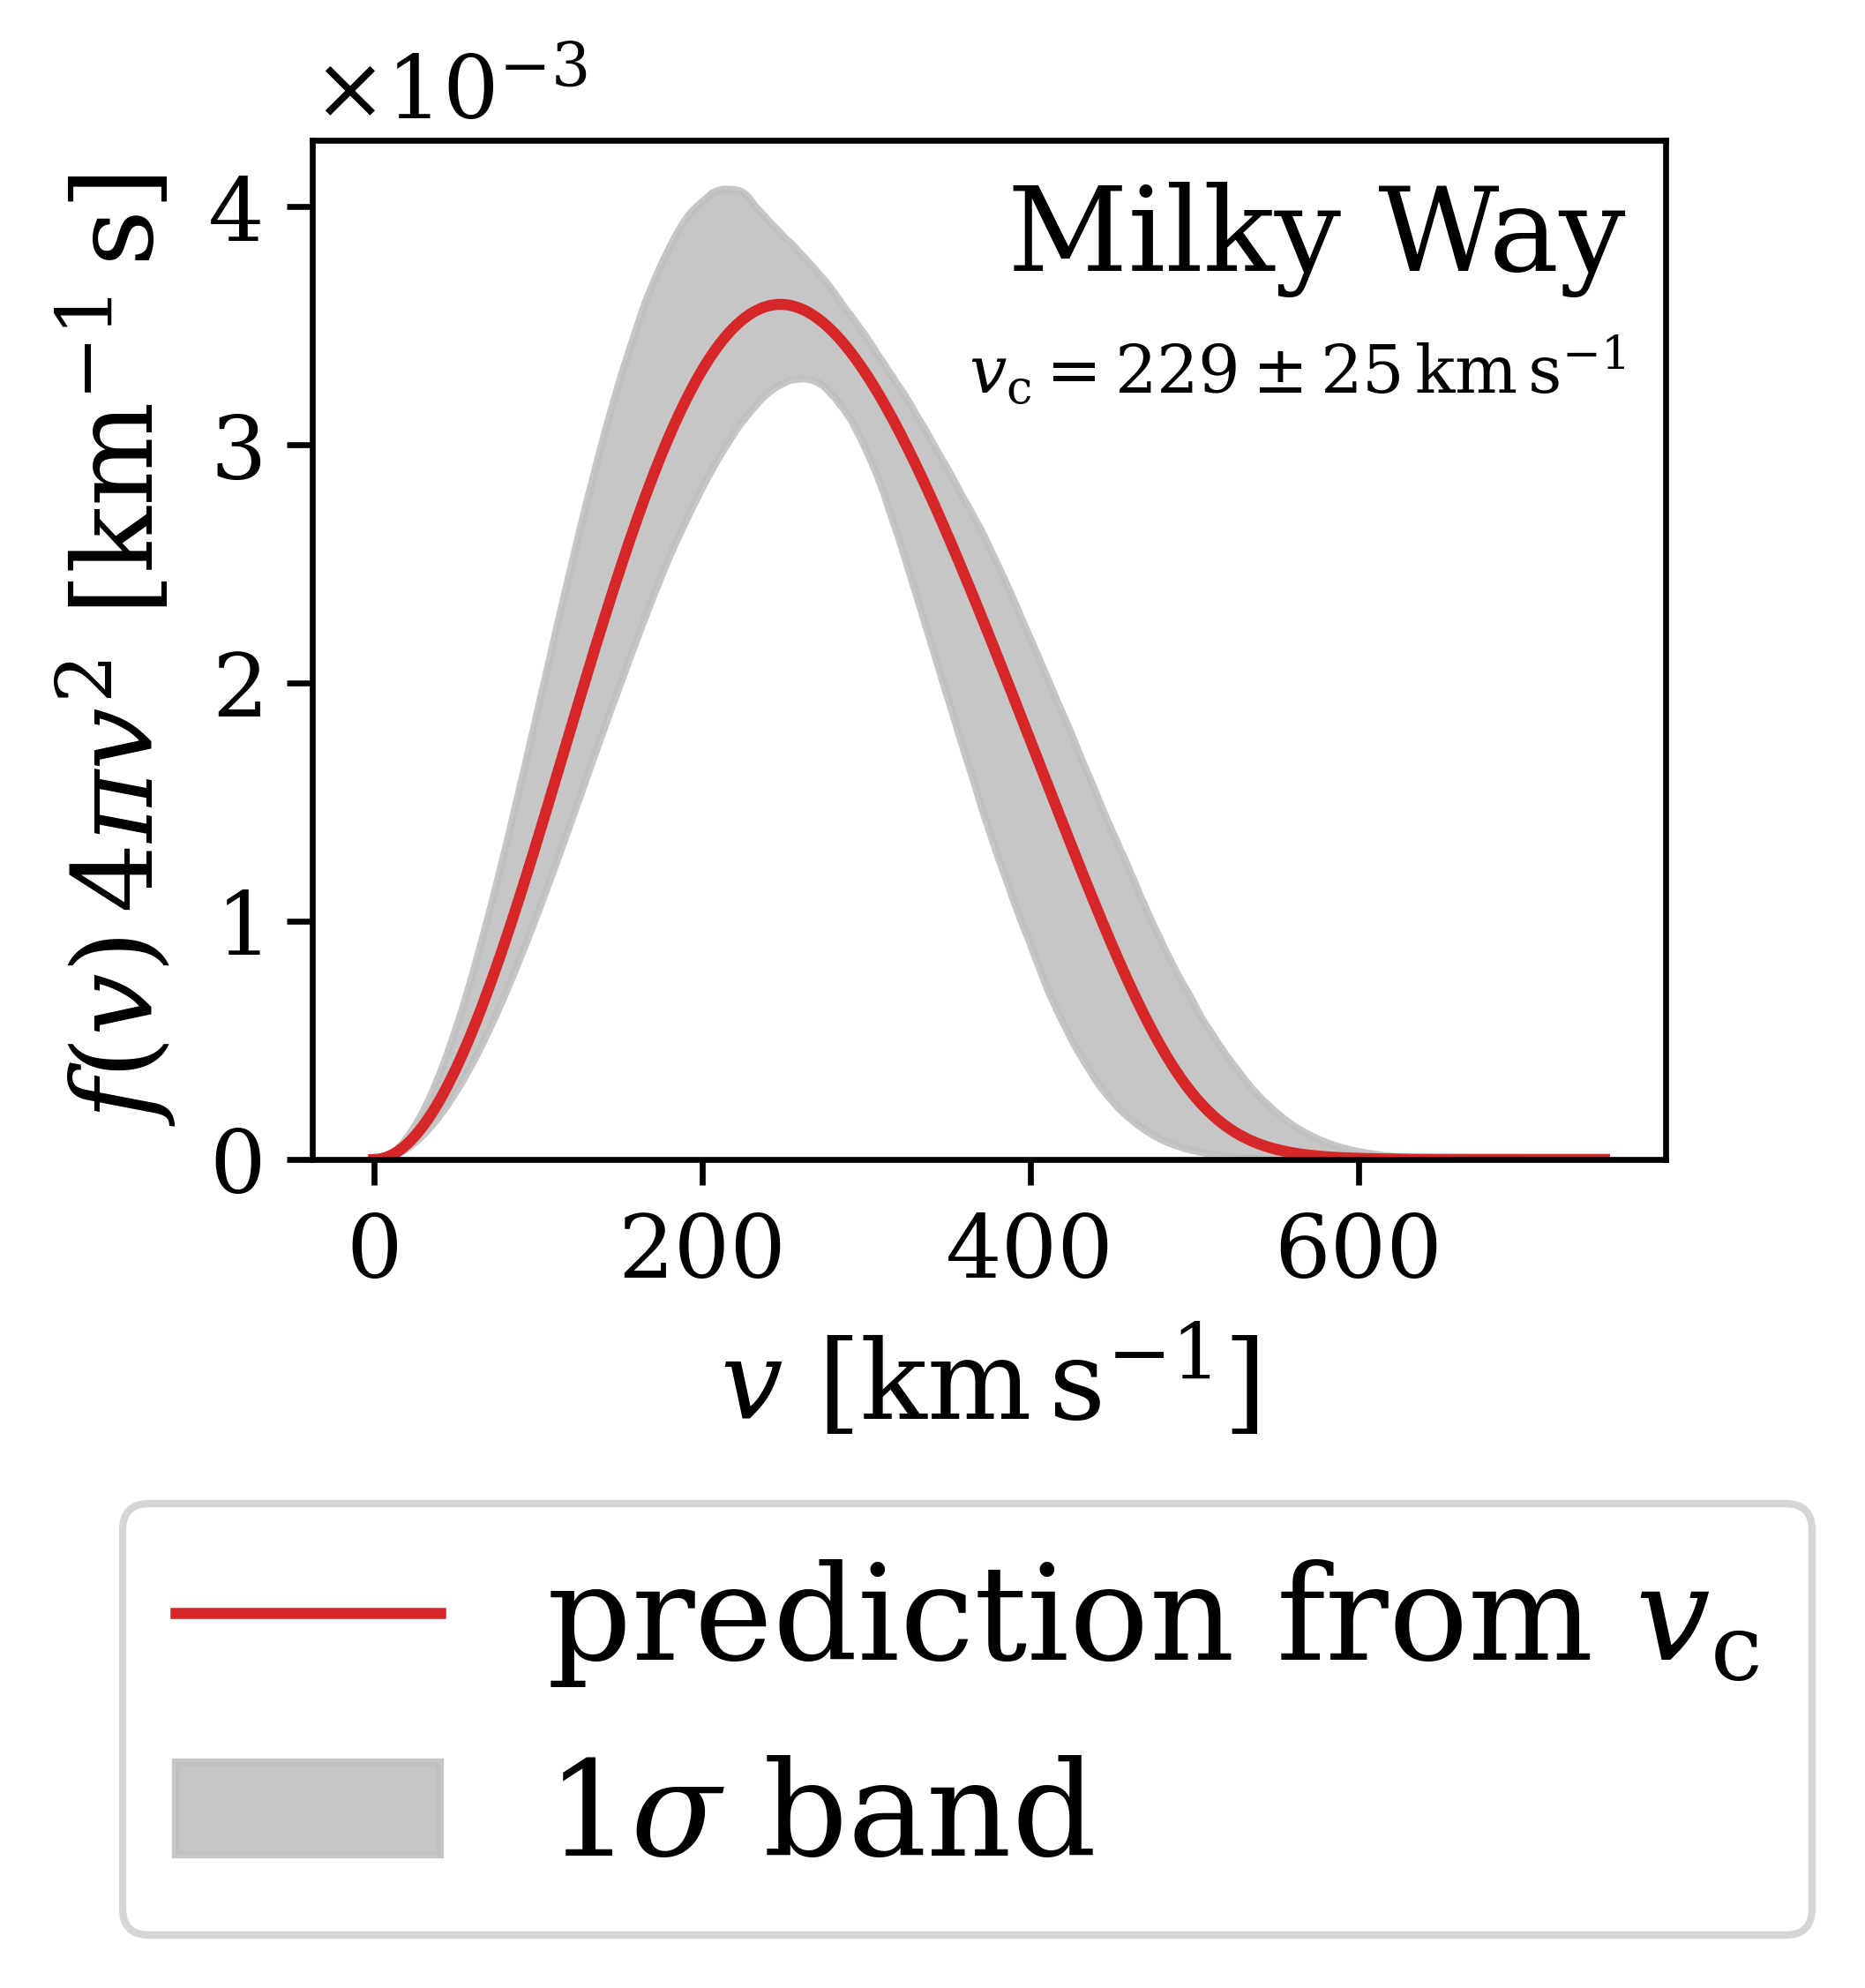

In [24]:
reload(dm_den_viz)
dm_den_viz.plt_mw(dvc=25.)

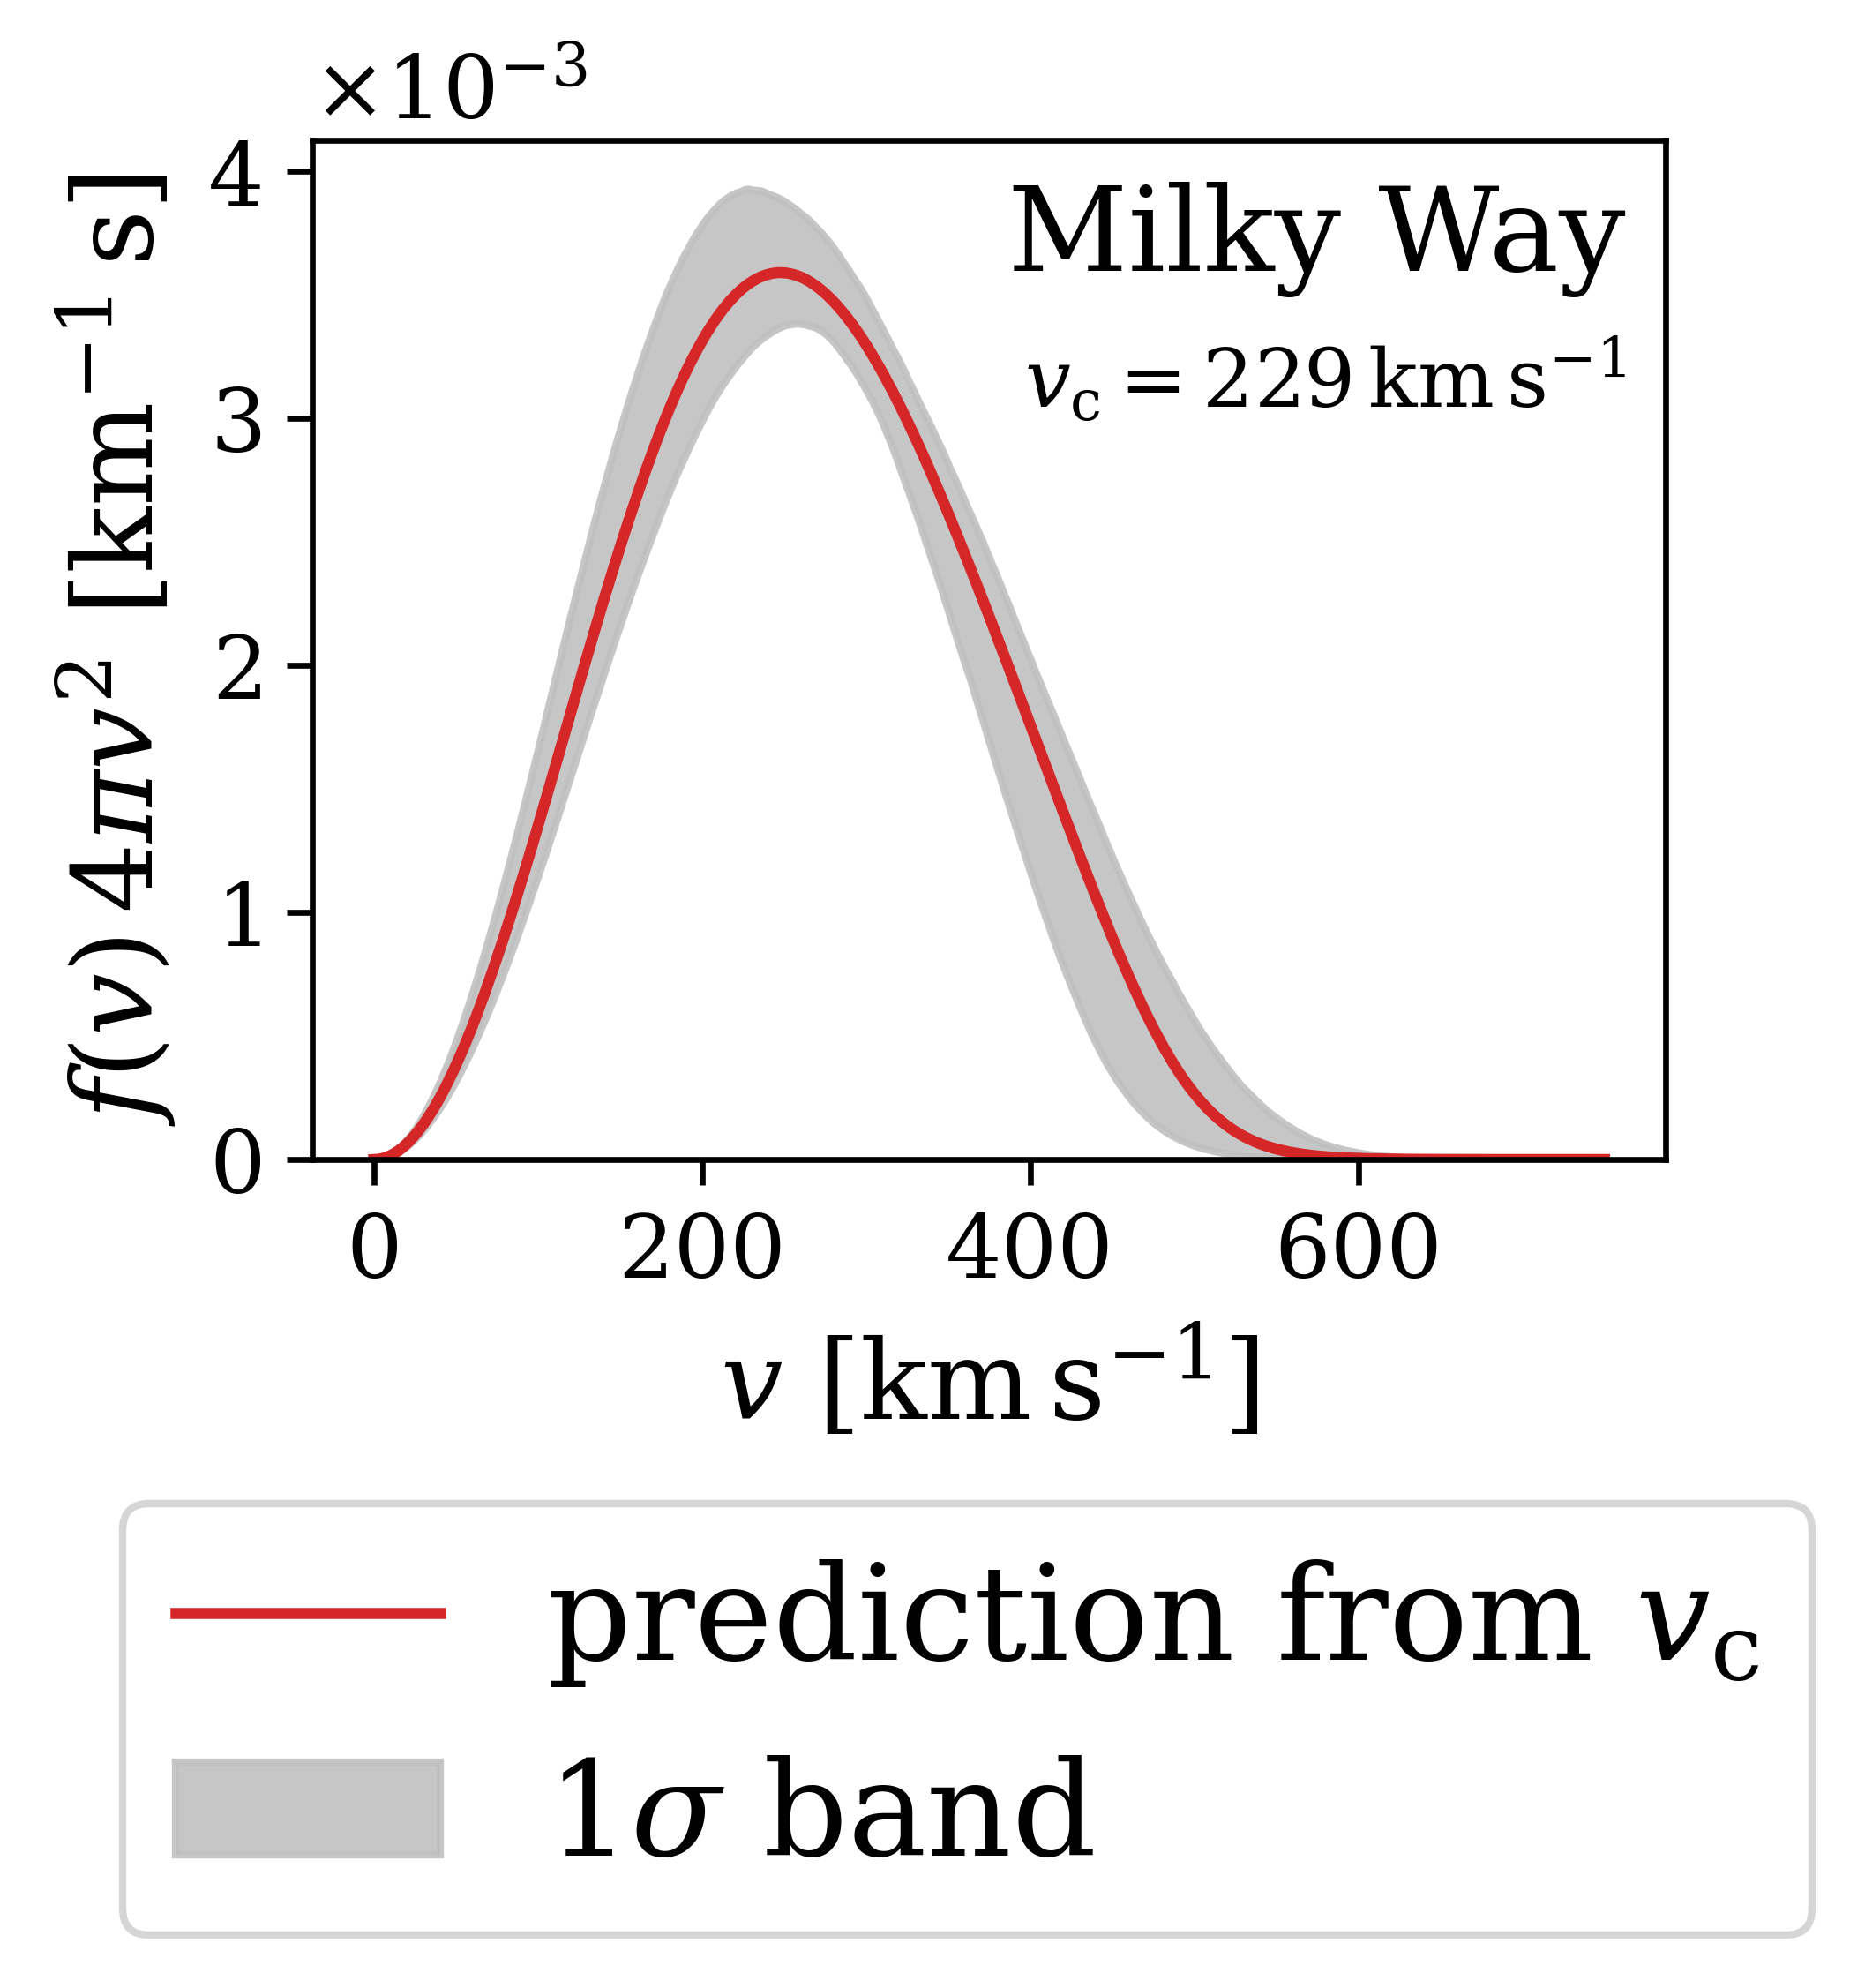

In [25]:
dm_den_viz.plt_mw(dvc=0.)

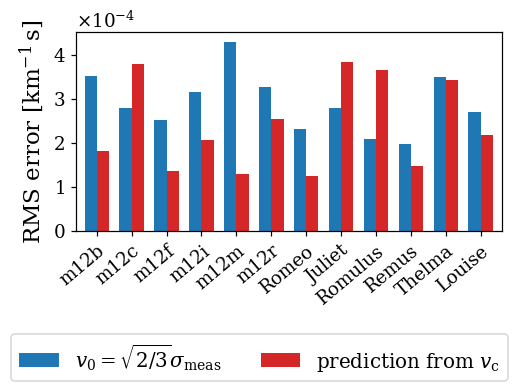

In [35]:
reload(fitting)
fitting.compare_methods(save_fname='rms.png', verbose=False)